### The classic imports and Keras import

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential, Model
from keras.layers.core import Dense, Activation
from keras.layers import Input

Using TensorFlow backend.


## Function to load & preprocess data

In [24]:
import os
from scipy import misc
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

ROOT_DIR = os.path.dirname(os.getcwd())

def load_mnist(size='100', test_size=0.2, dir_path='/Users/jonny/Desktop/PycharmProjects/ML-algorithms/Projects/Kamangar_NeuralNet/Tran_assignment_06'):
    path = ''
    if size == '100':
        path = dir_path + '/set3_100/'
    elif size == '2000':
        path = dir_path + '/set2_2k/'
    elif size == '20000':
        path = dir_path + '/train/'

    files_list = os.listdir(path)
    n_samples = len(files_list)
    X = np.ndarray((n_samples, 784))
    y = np.ndarray((n_samples, ))

    for i in range(n_samples):
        X[i] = np.asarray(misc.imread(path + files_list[i])).ravel()
        y[i] = int(files_list[i].split('_')[0])

    X = preprocessing.normalize(X)

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,
                                                        random_state=np.random.randint(0, 10000))

    return X_train, X_test, Y_train, Y_test

### Model Hyper-parameters

In [14]:
n_hidden = 100
input_size = x_train.shape[1]

## Define neural network structure

In [16]:
# Structure inspired from Francious Chollet's lectures
input_img = Input(shape=(input_size,))
encoder = Dense(n_hidden, activation='relu')(input_img)
decoder = Dense(input_size, activation='linear')(encoder)

# The model to train encoder & decoder layers for reconstruction
autoencoder = Model(input=input_img, output=decoder)

In [19]:
autoencoder.summary()
autoencoder.compile(optimizer='rmsprop', loss='mse')

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 784)           0                                            
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 100)           78500       input_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 784)           79184       dense_1[0][0]                    
Total params: 157684
____________________________________________________________________________________________________


# Task 1 Report


### Training hyper parameters

In [35]:
batch_size = 256
nb_epoch = 50

## Train the model

In [36]:
x_train, _, x_test, _ = load_mnist(size='20000', test_size=0.2)
train_20000 = autoencoder.fit(x_train, x_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    shuffle=True,
                    verbose=0)
x_train, _, x_test, _ = load_mnist(size='2000', test_size=0.2)
train_2000 = autoencoder.fit(x_train, x_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    shuffle=True,
                    verbose=0)

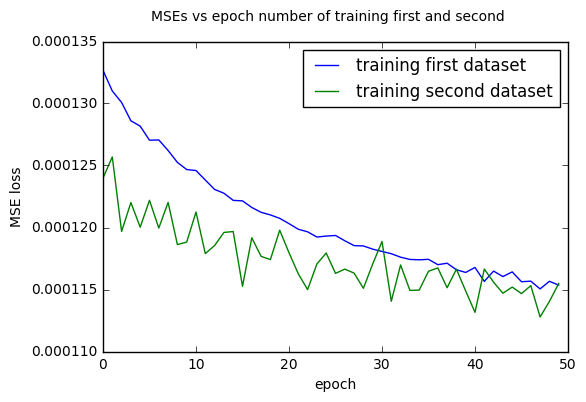

In [37]:
train_20000_handle, = plt.plot(train_20000.history['loss'], label='training first dataset')
train_2000_handle, = plt.plot(train_2000.history['loss'], label='training second dataset')
plt.legend(handles=[train_20000_handle, train_2000_handle])
plt.xlabel('epoch')
plt.ylabel('MSE loss')
plt.suptitle("MSEs vs epoch number of training first and second")

# Task 2